Required libraries have been imported

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Separate dataframes were created for each csv file

df1=pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
df2=pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
df3=pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")
df4=pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df5=pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
df7=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df8=pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

A function was written to remove empty values and duplicate values from the data in the created dataframes.

In [3]:
def drop_na(df):
  print("Before drop operation")
  print(df.shape)
  print(df.isnull().sum())
  columns_with_na = df.columns[df.isna().any()].tolist()
  print(columns_with_na)
  df_dropped = df.dropna()
  columns_with_na = df_dropped.columns[df_dropped.isna().any()].tolist()
  print(columns_with_na)
  print(len(columns_with_na))
  df_dropped.duplicated().sum()
  df =  df_dropped.drop_duplicates(keep="first")
  print("After drop operation")
  print(df.shape)
  return df

Each dataframe was processed separately according to the drop_na function.

In [4]:
df1 = drop_na(df1)

Before drop operation
(529918, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(502927, 79)


In [5]:
df2 = drop_na(df2)

Before drop operation
(445909, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(421683, 79)


In [6]:
df3 = drop_na(df3)

Before drop operation
(692703, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(610733, 79)


In [7]:
df4 = drop_na(df4)

Before drop operation
(170366, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(164281, 79)


In [8]:
df5 = drop_na(df5)

Before drop operation
(288602, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(252957, 79)


In [9]:
df6 = drop_na(df6)

Before drop operation
(191033, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(184117, 79)


In [10]:
df7 = drop_na(df7)

Before drop operation
(286467, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(214099, 79)


In [11]:
df8 = drop_na(df8)

Before drop operation
(225745, 79)
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
['Flow Bytes/s']
[]
0
After drop operation
(223108, 79)


A function was written to understand how many labels are in the dataframe.

In [12]:
def label_count(df):
    label_sayilari = df.iloc[:, -1].value_counts().to_dict()
    print(label_sayilari)

Label numbers in each dataframe were shown.

In [13]:
label_count(df1)
label_count(df2)
label_count(df3)
label_count(df4)
label_count(df5)
label_count(df6)
label_count(df7)
label_count(df8)

{'BENIGN': 502927}
{'BENIGN': 412531, 'FTP-Patator': 5933, 'SSH-Patator': 3219}
{'BENIGN': 416977, 'DoS Hulk': 172846, 'DoS GoldenEye': 10286, 'DoS slowloris': 5385, 'DoS Slowhttptest': 5228, 'Heartbleed': 11}
{'BENIGN': 162138, 'Web Attack � Brute Force': 1470, 'Web Attack � XSS': 652, 'Web Attack � Sql Injection': 21}
{'BENIGN': 252921, 'Infiltration': 36}
{'BENIGN': 182164, 'Bot': 1953}
{'BENIGN': 123280, 'PortScan': 90819}
{'DDoS': 128016, 'BENIGN': 95092}


Samples were taken with the downsampling method to reduce the impact of unbalanced data. Tags with benign values were added to the dataset at a rate of 5 percent.

In [14]:
def sampling(df):
    unique_labels = df.iloc[:, -1].unique()
    label_num = len(unique_labels)

    if label_num > 1:
        benign_veriler = df[df.iloc[:, -1] == "BENIGN"]
        benign_sample = benign_veriler.sample(frac=0.05)
        other_label = unique_labels[unique_labels != "BENIGN"]
        for label in other_label:
                other_data = df[df.iloc[:, -1] == label]
                benign_sample = pd.concat([benign_sample, other_data])
        new_df = benign_sample
    else:
        new_df = df.sample(frac=0.05)

    print(new_df.shape)
    return new_df

The sampling function was applied to each dataset.

In [15]:
df1_sample = sampling(df1)
df2_sample = sampling(df2)
df3_sample = sampling(df3)
df4_sample = sampling(df4)
df5_sample = sampling(df5)
df6_sample = sampling(df6)
df7_sample = sampling(df7)
df8_sample = sampling(df8)

(25146, 79)
(29779, 79)
(214605, 79)
(10250, 79)
(12682, 79)
(11061, 79)
(96983, 79)
(132771, 79)


Separately processed dataframes were combined.

In [16]:
df = pd.concat([df1_sample,df2_sample,df3_sample,df4_sample,df5_sample,df6_sample,df7_sample,df8_sample])
df.reset_index(drop=True, inplace=True)

The shape of the dataframe is shown

In [17]:
df.shape

(533277, 79)

Label numbers in the dataframe are shown.

In [18]:
label_count(df)

{'DoS Hulk': 172846, 'DDoS': 128016, 'BENIGN': 107402, 'PortScan': 90819, 'DoS GoldenEye': 10286, 'FTP-Patator': 5933, 'DoS slowloris': 5385, 'DoS Slowhttptest': 5228, 'SSH-Patator': 3219, 'Bot': 1953, 'Web Attack � Brute Force': 1470, 'Web Attack � XSS': 652, 'Infiltration': 36, 'Web Attack � Sql Injection': 21, 'Heartbleed': 11}


The first 5 rows of the dataframe are shown.

In [19]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53012,55,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
1,53,31363,4,4,172,300,43,43,43.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
2,80,5051460,3,1,12,2,6,0,4.000000,3.464102,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
3,55406,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
4,443,106297714,24,29,1190,19934,586,0,49.583333,155.933352,...,32,82495.5,144431.955192,493556,36679,10011566.1,6494.664741,10027052,9999818,BENIGN


Label column was encoded with Label Encoder.

In [20]:
label_encoder = LabelEncoder()
df.iloc[:,-1] = label_encoder.fit_transform(df.iloc[:,-1])


The first 5 lines of the encoded dataframe are shown.

In [21]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53012,55,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,53,31363,4,4,172,300,43,43,43.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,80,5051460,3,1,12,2,6,0,4.000000,3.464102,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
3,55406,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,443,106297714,24,29,1190,19934,586,0,49.583333,155.933352,...,32,82495.5,144431.955192,493556,36679,10011566.1,6494.664741,10027052,9999818,0


Labels of the encoded dataframe are shown

In [22]:
label_count(df)

{4: 172846, 2: 128016, 0: 107402, 10: 90819, 3: 10286, 7: 5933, 6: 5385, 5: 5228, 11: 3219, 1: 1953, 12: 1470, 14: 652, 9: 36, 13: 21, 8: 11}


The correlation of the data in the dataframe on the label was checked. A new dataframe was created with columns whose correlation was greater than 0.20.

In [23]:
correlation_matrix = df.corr()
selected_columns = correlation_matrix.iloc[:,-1][abs(correlation_matrix.iloc[:,-1]) > 0.20].index
df_selected = df[selected_columns]

The first 5 rows of the dataframe created with the selected columns are shown

In [24]:
df_selected.head()

,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,Packet Length Mean,Packet Length Std,PSH Flag Count,ACK Flag Count,Average Packet Size,Avg Bwd Segment Size,Init_Win_bytes_forward,Label
0,0,0.00000,18181.818182,0,0.000000,0.000000,0,1,0.000000,0.00000,114,0
1,75,75.00000,127.538820,43,57.222222,16.865481,0,0,64.375000,75.00000,-1,0
2,2,2.00000,0.197963,0,2.800000,3.033150,1,0,3.500000,2.00000,29200,0
3,0,0.00000,0.000000,6,6.000000,0.000000,0,1,9.000000,0.00000,360,0
4,0,687.37931,0.272819,0,391.185185,618.835153,1,0,398.566038,687.37931,29200,0


A function was written to get rid of outliers in the data.

In [25]:
def remove_outliers(df, threshold=3):
    df_no_outliers = df.copy()
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    return df_no_outliers

The function was executed on the data.

In [26]:
df_noout= remove_outliers(df_selected)

Information about the dataframe was received.

In [27]:
df_noout.head()

,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,Packet Length Mean,Packet Length Std,PSH Flag Count,ACK Flag Count,Average Packet Size,Avg Bwd Segment Size,Init_Win_bytes_forward,Label
0,0,0.00000,18181.818182,0,0.000000,0.000000,0,1,0.000000,0.00000,114,0
1,75,75.00000,127.538820,43,57.222222,16.865481,0,0,64.375000,75.00000,-1,0
2,2,2.00000,0.197963,0,2.800000,3.033150,1,0,3.500000,2.00000,29200,0
3,0,0.00000,0.000000,6,6.000000,0.000000,0,1,9.000000,0.00000,360,0
4,0,687.37931,0.272819,0,391.185185,618.835153,1,0,398.566038,687.37931,29200,0


In [28]:
df_noout.shape

(508637, 12)

In [29]:
label_count(df_noout)

{4: 172798, 2: 127707, 10: 88345, 0: 86654, 3: 10286, 7: 5928, 6: 5383, 5: 4899, 11: 3218, 1: 1882, 12: 1470, 9: 36, 13: 21, 8: 10}


Standard scaler was used for numerical data on the dataframe.

In [30]:
scaler = StandardScaler()
df_noout.iloc[:,:-1] = scaler.fit_transform(df_noout.iloc[:,:-1])

The first 5 rows of the data set are shown

In [31]:
df_noout.head()

,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,Packet Length Mean,Packet Length Std,PSH Flag Count,ACK Flag Count,Average Packet Size,Avg Bwd Segment Size,Init_Win_bytes_forward,Label
0,-0.305300,-0.968681,0.942297,-0.346414,-0.978900,-0.920921,-0.840241,1.207945,-0.971714,-0.968681,-0.606862,0
1,3.120205,-0.896557,-0.391813,4.037979,-0.863404,-0.905465,-0.840241,-0.827852,-0.854068,-0.896557,-0.617270,0
2,-0.213953,-0.966758,-0.401223,-0.346414,-0.973249,-0.918141,1.190134,-0.827852,-0.965317,-0.966758,2.025553,0
3,-0.305300,-0.968681,-0.401238,0.265362,-0.966790,-0.920921,-0.840241,1.207945,-0.955266,-0.968681,-0.584598,0
4,-0.305300,-0.307656,-0.401218,-0.346414,-0.189340,-0.353828,1.190134,-0.827852,-0.243332,-0.307656,2.025553,0


The distribution of the labels was shown.

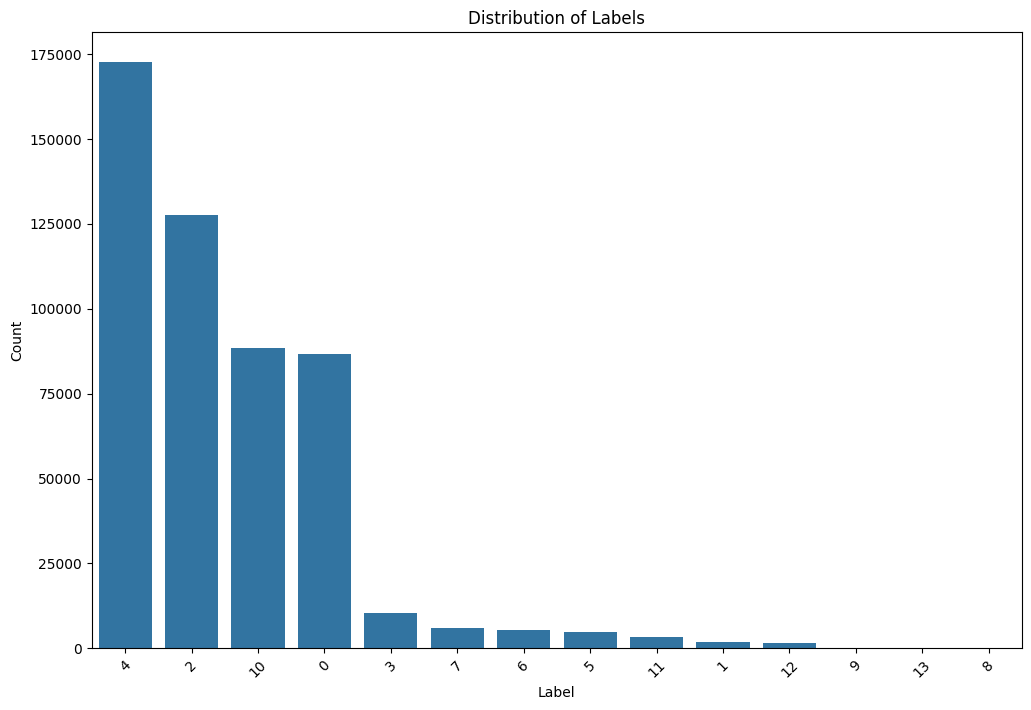

In [32]:
label_counts = df_noout.iloc[:,-1].value_counts()
plt.figure(figsize=(12, 8))
sns.countplot(data=df_noout, x=' Label', order=label_counts.index)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Count, mean, std, min, max and quartiles were shown.

In [33]:
summary_stats = df_noout.describe()
print(summary_stats)

        Bwd Packet Length Min   Bwd Packet Length Mean   Bwd Packets/s  \
count            5.086370e+05             5.086370e+05    5.086370e+05   
mean            -1.154443e-16             3.665609e-17    2.112195e-16   
std              1.000001e+00             1.000001e+00    1.000001e+00   
min             -3.053000e-01            -9.686813e-01   -4.012378e-01   
25%             -3.053000e-01            -9.629113e-01   -4.012333e-01   
50%             -3.053000e-01            -5.911761e-01   -4.012227e-01   
75%             -3.125958e-02             8.897276e-01   -3.906005e-01   
max              5.860609e+00             2.808012e+00    8.835562e+00   

        Min Packet Length   Packet Length Mean   Packet Length Std  \
count        5.086370e+05         5.086370e+05        5.086370e+05   
mean         4.246742e-18         5.660460e-17       -2.006585e-16   
std          1.000001e+00         1.000001e+00        1.000001e+00   
min         -3.464140e-01        -9.789004e-01       

Histograms of numerical variables were created.

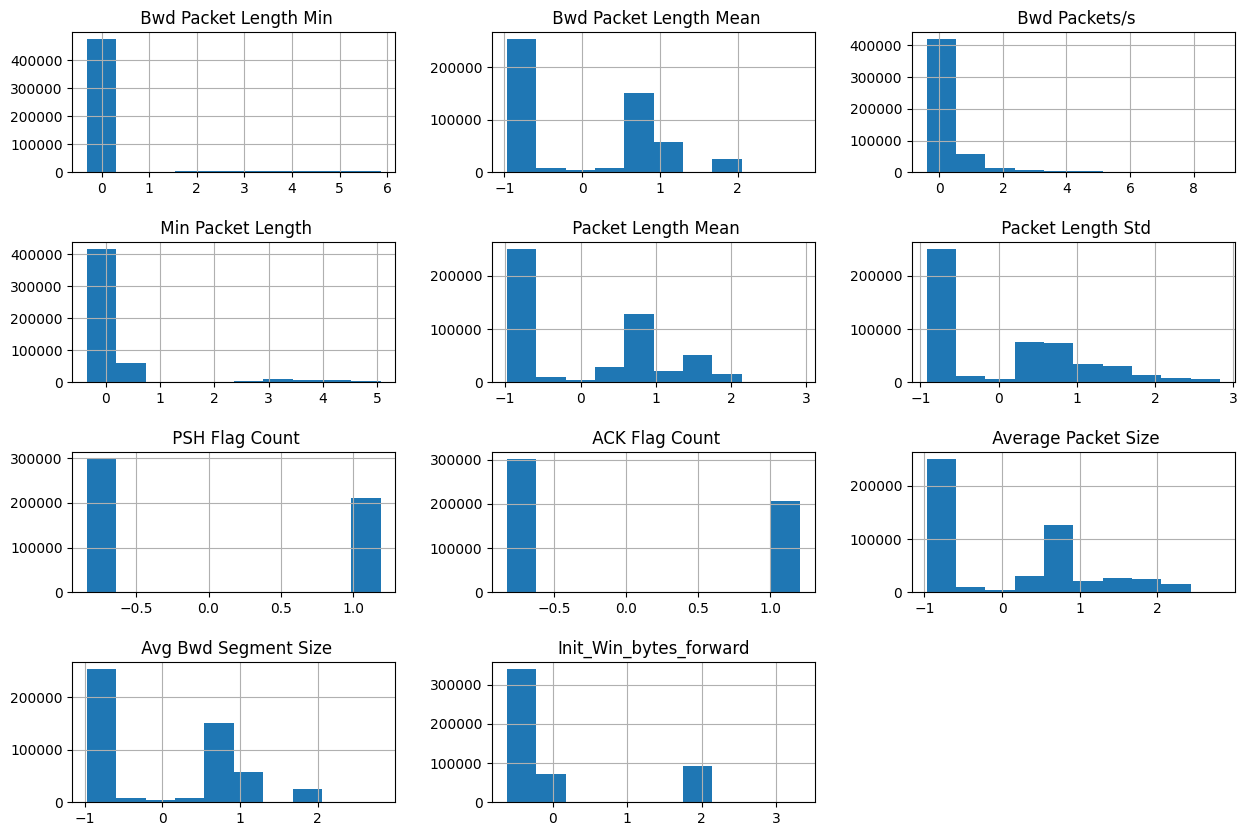

In [34]:
df_noout.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()

Relationships between variables were visualized.

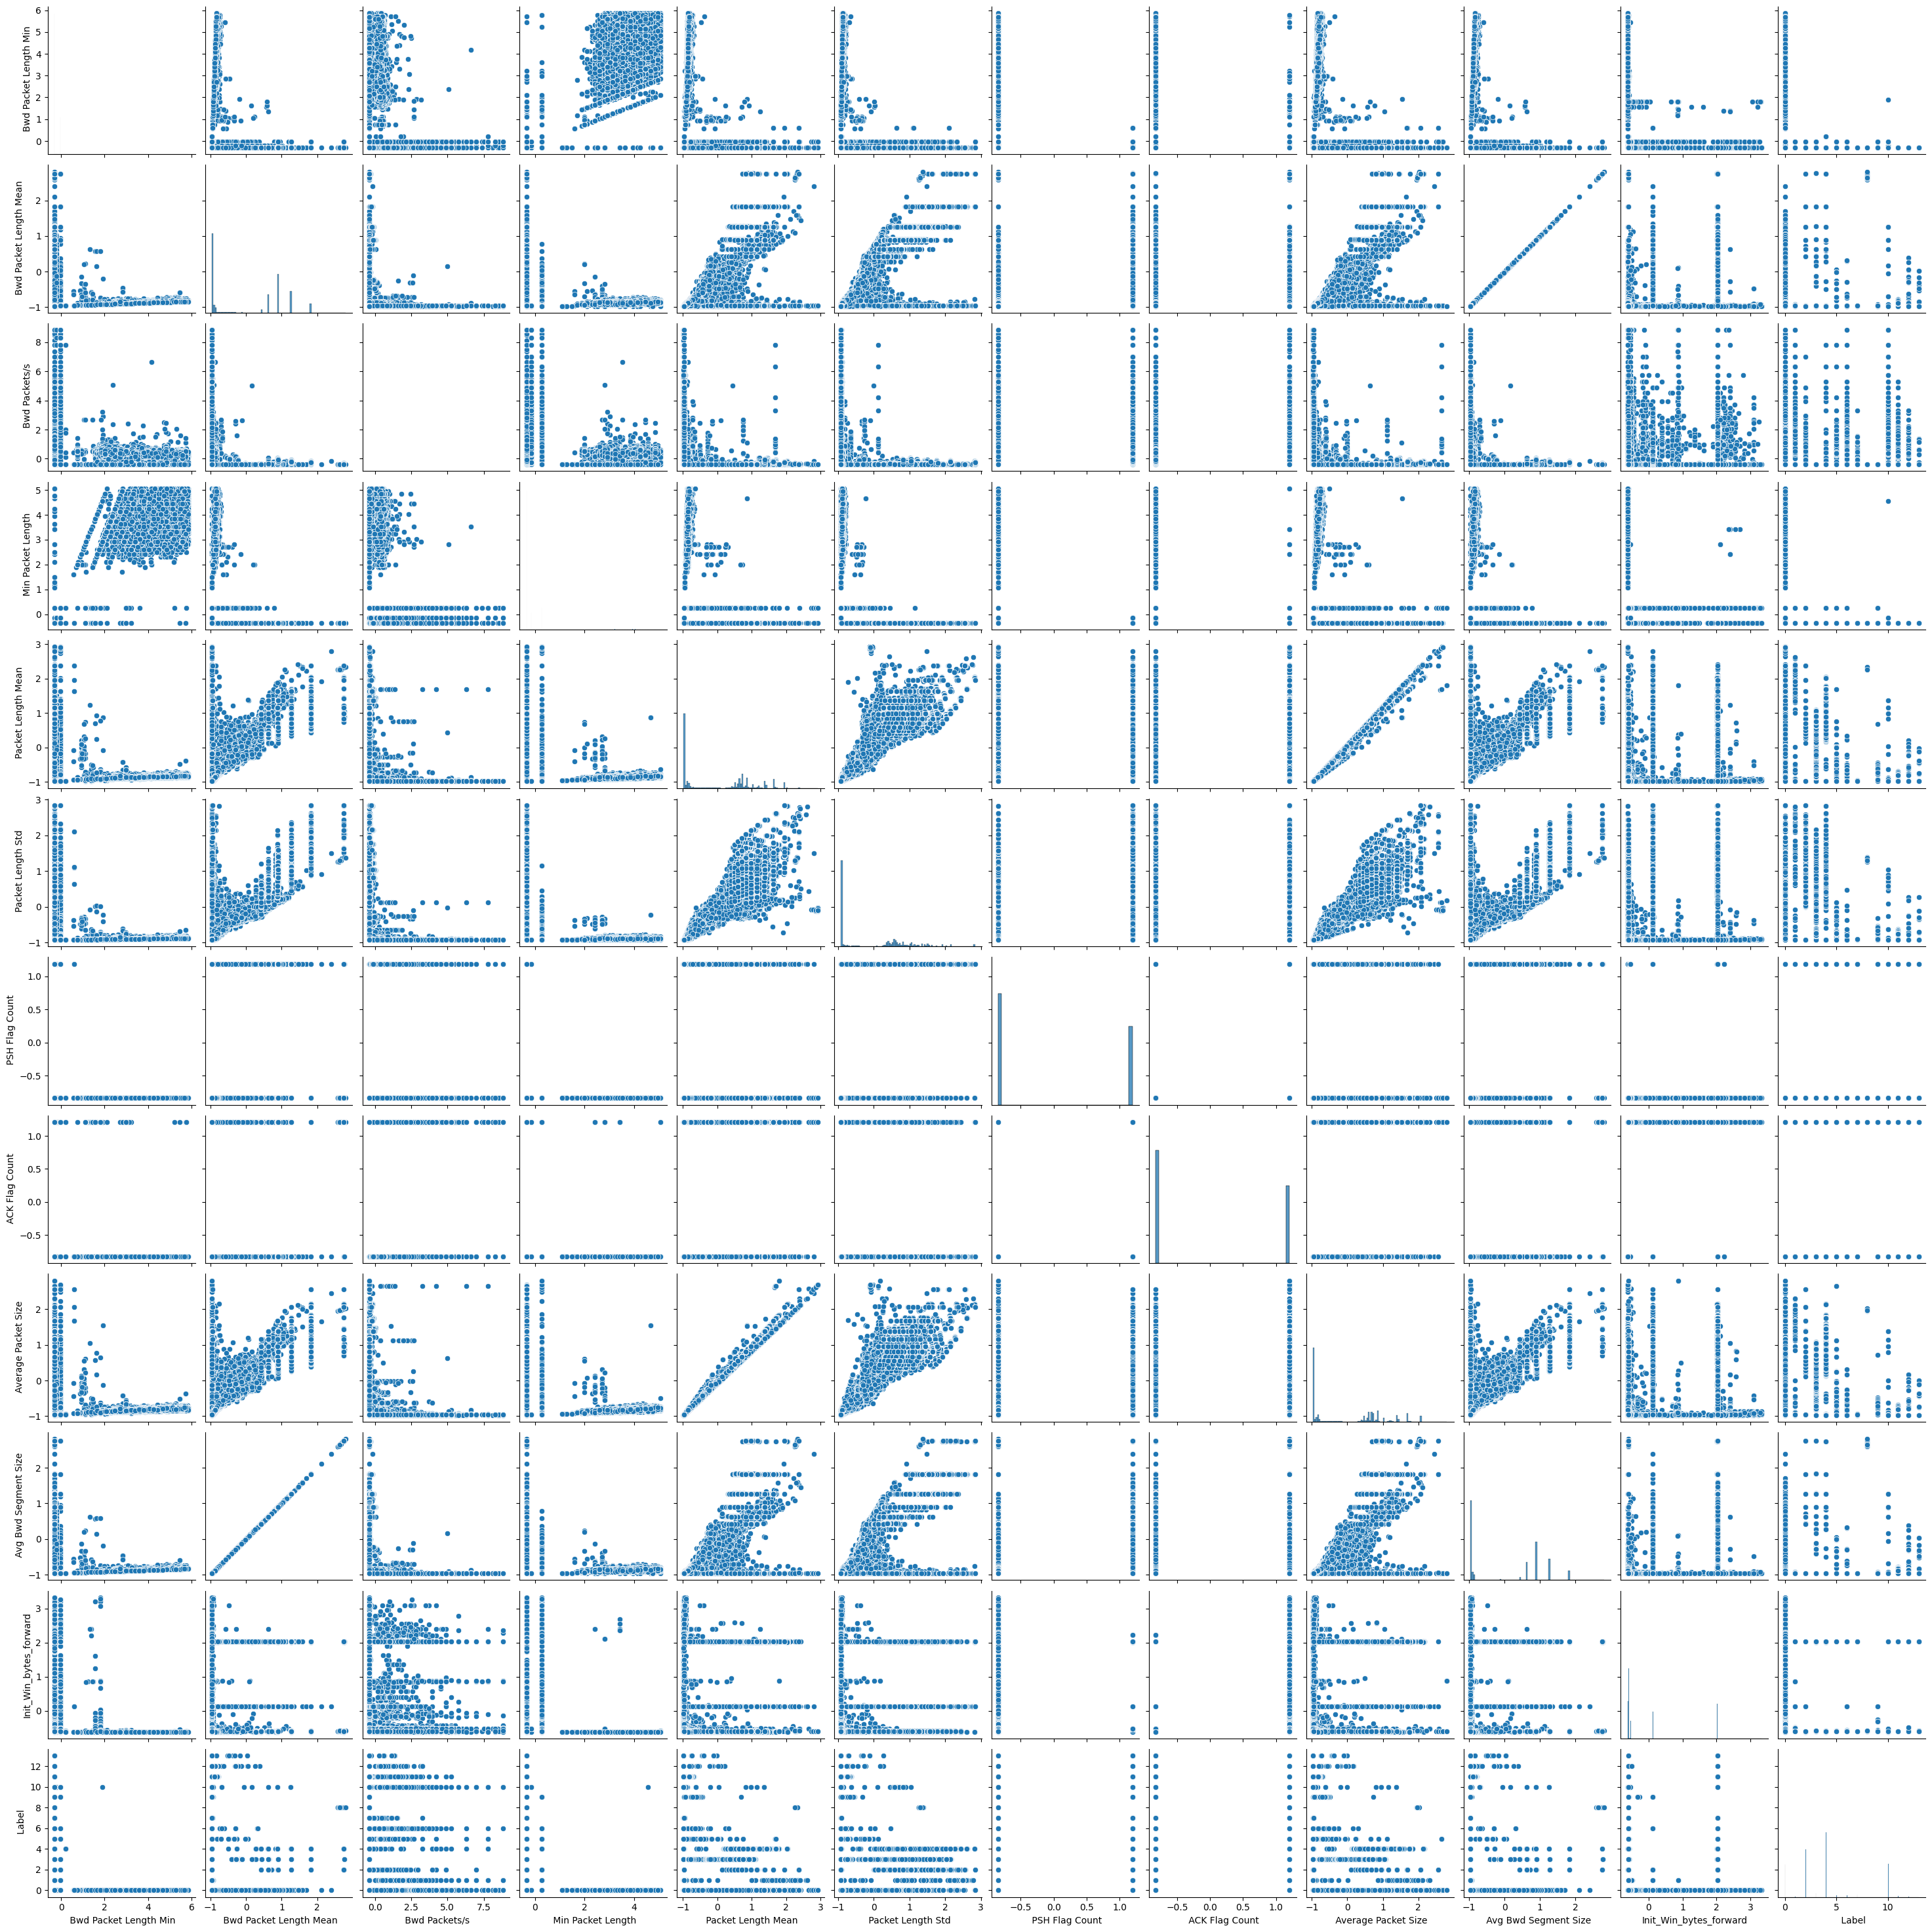

In [35]:
sns.pairplot(df_noout)
plt.show()

The correlation between the columns and the label was visualized.

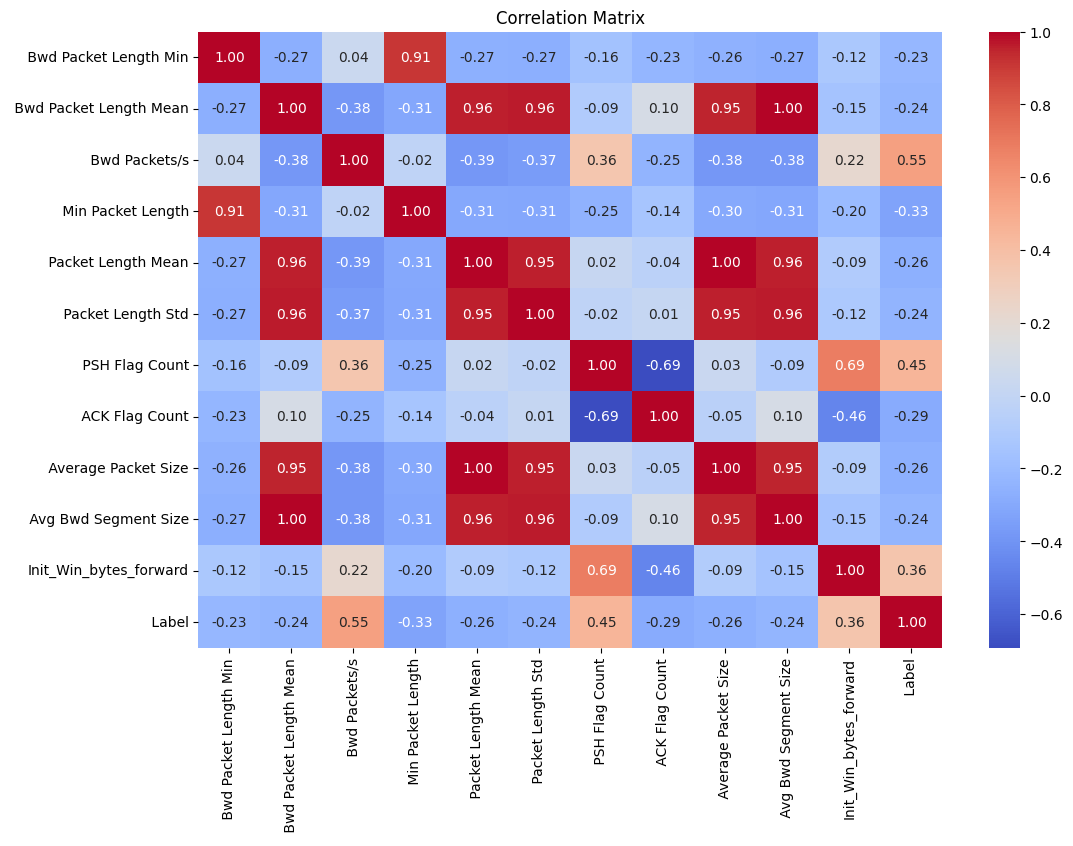

In [36]:
correlation_matrix = df_noout.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The label column of the dataframe was converted from object type to integer type.

In [37]:
df_noout[' Label'] = df_noout[' Label'].astype(int)

Label values and other variables in the Dataframe were separated as X and Y.

In [38]:
X= df_noout.drop([' Label'],axis=1)
y = df_noout[' Label']

X and y were separated by train test split to be inserted into the machine learning model.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A function was written to enter the data into the machine learning model and evaluate the model.

In [40]:
def model_fit_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print("Model is fitted")
    y_pred = model.predict(X_test)
    print("Predictions are ready")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    wrong = (y_test != y_pred).sum()
    print('Number of incorrect predictions by RandomForestClassifier:', wrong)

The function was applied on the data with the RandomForest model.

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_fit_evaluate(rf, X_train, X_test, y_train, y_test)

Model is fitted
Predictions are ready
Accuracy: 0.9936399024850582
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17138
           1       0.97      0.98      0.97       370
           2       1.00      1.00      1.00     25782
           3       0.99      0.99      0.99      2043
           4       1.00      1.00      1.00     34521
           5       0.75      0.99      0.86       981
           6       1.00      0.71      0.83      1095
           7       1.00      1.00      1.00      1150
           8       1.00      1.00      1.00         1
           9       1.00      0.45      0.62        11
          10       1.00      1.00      1.00     17661
          11       0.99      0.99      0.99       672
          12       0.69      0.99      0.82       299
          13       1.00      0.00      0.00         4

    accuracy                           0.99    101728
   macro avg       0.96      0.86      0.86    101728
weighted avg 

The function was applied on the data with the LogisticRegression model.

In [42]:
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
model_fit_evaluate(logistic_classifier, X_train, X_test, y_train, y_test)

Model is fitted
Predictions are ready
Accuracy: 0.8806719880465556
              precision    recall  f1-score   support

           0       0.87      0.80      0.84     17138
           1       1.00      0.00      0.00       370
           2       0.93      0.86      0.90     25782
           3       0.93      0.66      0.77      2043
           4       0.84      0.97      0.90     34521
           5       0.33      0.06      0.10       981
           6       0.84      0.34      0.48      1095
           7       0.35      0.68      0.46      1150
           8       1.00      1.00      1.00         1
           9       1.00      0.00      0.00        11
          10       0.97      0.99      0.98     17661
          11       0.00      0.00      1.00       672
          12       1.00      0.00      0.00       299
          13       1.00      0.00      0.00         4

    accuracy                           0.88    101728
   macro avg       0.79      0.45      0.53    101728
weighted avg 

C:\Users\Erarducc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The function was applied on the data with the GradientBoosting model.

In [43]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_fit_evaluate(gb_classifier, X_train, X_test, y_train, y_test)


Model is fitted
Predictions are ready
Accuracy: 0.9895407360805285
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17138
           1       0.97      0.94      0.96       370
           2       1.00      1.00      1.00     25782
           3       0.99      0.98      0.99      2043
           4       1.00      1.00      1.00     34521
           5       0.74      0.96      0.83       981
           6       0.97      0.71      0.82      1095
           7       1.00      1.00      1.00      1150
           8       1.00      1.00      1.00         1
           9       0.16      0.82      0.27        11
          10       1.00      1.00      1.00     17661
          11       1.00      0.98      0.99       672
          12       0.87      0.11      0.20       299
          13       0.00      0.00      1.00         4

    accuracy                           0.99    101728
   macro avg       0.83      0.82      0.86    101728
weighted avg 

The function was applied on the data with the KNN model.

In [44]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
model_fit_evaluate(knn_classifier, X_train, X_test, y_train, y_test)


Model is fitted
Predictions are ready
Accuracy: 0.9879777445737653
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     17138
           1       0.85      0.94      0.89       370
           2       1.00      1.00      1.00     25782
           3       0.97      0.97      0.97      2043
           4       1.00      1.00      1.00     34521
           5       0.99      0.41      0.58       981
           6       0.65      0.97      0.78      1095
           7       0.99      0.99      0.99      1150
           8       1.00      1.00      1.00         1
           9       0.89      0.73      0.80        11
          10       1.00      1.00      1.00     17661
          11       0.96      0.94      0.95       672
          12       0.70      0.79      0.74       299
          13       1.00      0.00      0.00         4

    accuracy                           0.99    101728
   macro avg       0.93      0.84      0.83    101728
weighted avg 

Columns with less than 10000 in the Label column were discarded from the data.

In [49]:
df=df_noout.groupby(' Label').filter(lambda x:len(x)>10000)
X= df.drop([' Label'],axis=1)
y = df[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The function was applied on the data with the RandomForest model.

In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_fit_evaluate(rf, X_train, X_test, y_train, y_test)

Model is fitted
Predictions are ready
Accuracy: 0.9987546058996686
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17267
           2       1.00      1.00      1.00     25579
           3       0.99      0.99      0.99      2048
           4       1.00      1.00      1.00     34689
          10       1.00      1.00      1.00     17575

    accuracy                           1.00     97158
   macro avg       1.00      1.00      1.00     97158
weighted avg       1.00      1.00      1.00     97158

Confusion Matrix:
[[17227     8     2    22     8]
 [   17 25562     0     0     0]
 [    4     0  2030    14     0]
 [   17     0    13 34659     0]
 [    6     0     0    10 17559]]
Number of incorrect predictions by RandomForestClassifier: 121


The function was applied on the data with the LogisticRegression model.

In [51]:
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
model_fit_evaluate(logistic_classifier, X_train, X_test, y_train, y_test)

Model is fitted
Predictions are ready
Accuracy: 0.907840836575475
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     17267
           2       0.93      0.86      0.89     25579
           3       0.93      0.64      0.76      2048
           4       0.85      0.97      0.91     34689
          10       0.95      0.99      0.97     17575

    accuracy                           0.91     97158
   macro avg       0.93      0.85      0.88     97158
weighted avg       0.91      0.91      0.91     97158

Confusion Matrix:
[[13686   954    69  1731   827]
 [   28 22072     6  3470     3]
 [  178     6  1309   554     1]
 [  199   720    17 33707    46]
 [  117     0     0    28 17430]]
Number of incorrect predictions by RandomForestClassifier: 8954


The function was applied on the data with the GradientBoosting model.

In [52]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_fit_evaluate(gb_classifier, X_train, X_test, y_train, y_test)

Model is fitted
Predictions are ready
Accuracy: 0.9972724839951419
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17267
           2       1.00      1.00      1.00     25579
           3       0.99      0.99      0.99      2048
           4       1.00      1.00      1.00     34689
          10       1.00      1.00      1.00     17575

    accuracy                           1.00     97158
   macro avg       1.00      1.00      1.00     97158
weighted avg       1.00      1.00      1.00     97158

Confusion Matrix:
[[17162    12    10    66    17]
 [   19 25559     0     1     0]
 [   21     0  2027     0     0]
 [   81     0    17 34591     0]
 [   11     0     0    10 17554]]
Number of incorrect predictions by RandomForestClassifier: 265


The function was applied on the data with the KNN model.

In [53]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
model_fit_evaluate(knn_classifier, X_train, X_test, y_train, y_test)

Model is fitted
Predictions are ready
Accuracy: 0.9975195043125631
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17267
           2       1.00      1.00      1.00     25579
           3       0.98      0.99      0.99      2048
           4       1.00      1.00      1.00     34689
          10       1.00      1.00      1.00     17575

    accuracy                           1.00     97158
   macro avg       1.00      1.00      1.00     97158
weighted avg       1.00      1.00      1.00     97158

Confusion Matrix:
[[17186    16    15    26    24]
 [   24 25541     0    14     0]
 [   13     1  2020    14     0]
 [   32    28    17 34612     0]
 [    6     0     0    11 17558]]
Number of incorrect predictions by RandomForestClassifier: 241
